In [6]:
import cv2
import matplotlib.pyplot as plt

def plot_and_save_dense_grid(image_path, rows, cols, output_path="gridded_image.jpg"):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    cell_w = w // cols
    cell_h = h // rows

    grid_coords = []

    for row in range(rows):
        for col in range(cols):
            x = col * cell_w
            y = row * cell_h
            grid_coords.append((x, y, cell_w, cell_h))
            cv2.rectangle(img, (x, y), (x + cell_w, y + cell_h), (0, 255, 0), 1)
            cv2.putText(img, f"{row},{col}", (x + 3, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

    # Save the image with grid
    cv2.imwrite(output_path, img)

    # Show using matplotlib
    img_to_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(img_to_show)
    plt.title(f"Saved Grid Image ({rows}x{cols})")
    plt.axis('off')
    plt.show()

    return grid_coords


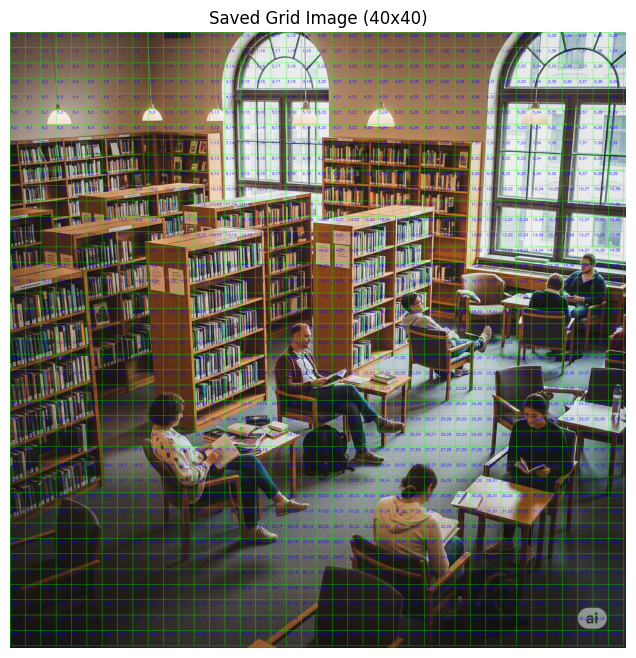

[(0, 0, 51, 51),
 (51, 0, 51, 51),
 (102, 0, 51, 51),
 (153, 0, 51, 51),
 (204, 0, 51, 51),
 (255, 0, 51, 51),
 (306, 0, 51, 51),
 (357, 0, 51, 51),
 (408, 0, 51, 51),
 (459, 0, 51, 51),
 (510, 0, 51, 51),
 (561, 0, 51, 51),
 (612, 0, 51, 51),
 (663, 0, 51, 51),
 (714, 0, 51, 51),
 (765, 0, 51, 51),
 (816, 0, 51, 51),
 (867, 0, 51, 51),
 (918, 0, 51, 51),
 (969, 0, 51, 51),
 (1020, 0, 51, 51),
 (1071, 0, 51, 51),
 (1122, 0, 51, 51),
 (1173, 0, 51, 51),
 (1224, 0, 51, 51),
 (1275, 0, 51, 51),
 (1326, 0, 51, 51),
 (1377, 0, 51, 51),
 (1428, 0, 51, 51),
 (1479, 0, 51, 51),
 (1530, 0, 51, 51),
 (1581, 0, 51, 51),
 (1632, 0, 51, 51),
 (1683, 0, 51, 51),
 (1734, 0, 51, 51),
 (1785, 0, 51, 51),
 (1836, 0, 51, 51),
 (1887, 0, 51, 51),
 (1938, 0, 51, 51),
 (1989, 0, 51, 51),
 (0, 51, 51, 51),
 (51, 51, 51, 51),
 (102, 51, 51, 51),
 (153, 51, 51, 51),
 (204, 51, 51, 51),
 (255, 51, 51, 51),
 (306, 51, 51, 51),
 (357, 51, 51, 51),
 (408, 51, 51, 51),
 (459, 51, 51, 51),
 (510, 51, 51, 51),
 (561,

In [8]:
plot_and_save_dense_grid(r"C:\Users\swaya\Downloads\Gemini_Generated_Image_qi4z48qi4z48qi4z.png", rows=40, cols=40, output_path="output_grid.jpg")


In [9]:
import cv2
import numpy as np

def crop_custom_region_from_grid(image_path, grid_coords, region_points):
    """
    region_points: list of (row, col) that form a closed polygon
    grid_coords: output from plot_and_save_dense_grid
    """
    img = cv2.imread(image_path)
    h, w, _ = img.shape
    rows = max(r for r, c in region_points) + 1
    cols = max(c for r, c in region_points) + 1
    cell_w = w // cols
    cell_h = h // rows

    # Convert (row, col) to (x, y) pixels
    polygon = []
    for row, col in region_points:
        x = col * cell_w
        y = row * cell_h
        polygon.append([x, y])
    polygon = np.array([polygon], dtype=np.int32)

    # Create mask
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, polygon, 255)

    # Apply mask
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    # Crop bounding box around the polygon
    x, y, w_box, h_box = cv2.boundingRect(polygon)
    cropped = masked_img[y:y+h_box, x:x+w_box]

    return cropped


In [10]:
# Suppose you already used this before
coords = plot_and_save_dense_grid("your_image.jpg", rows=30, cols=35)

# Now crop region 1
region1 = [(19,18),(19,22),(26,22),(26,18)]
sub_img1 = crop_custom_region_from_grid("your_image.jpg", coords, region1)

# Region 2
region2 = [(15,29), (19,29), (19,32), (15,32)]
sub_img2 = crop_custom_region_from_grid("your_image.jpg", coords, region2)

# Show cropped regions
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(sub_img1, cv2.COLOR_BGR2RGB))
plt.title("Region 1")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(sub_img2, cv2.COLOR_BGR2RGB))
plt.title("Region 2")
plt.axis('off')
plt.show()


AttributeError: 'NoneType' object has no attribute 'copy'

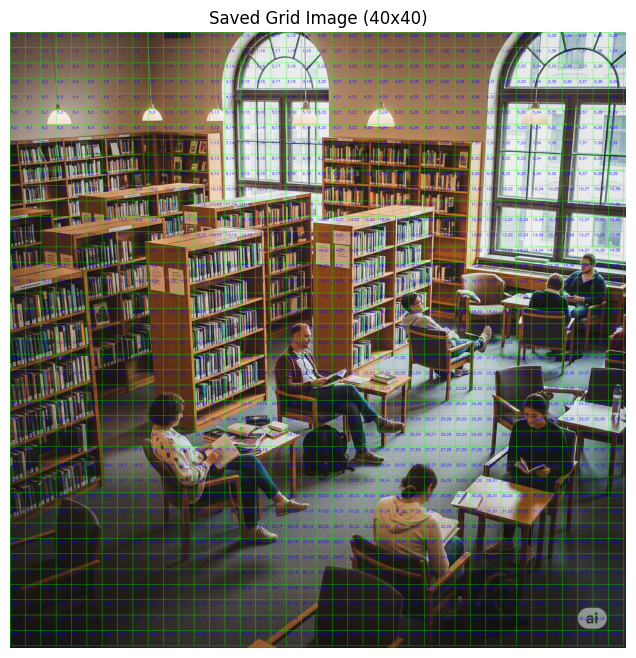

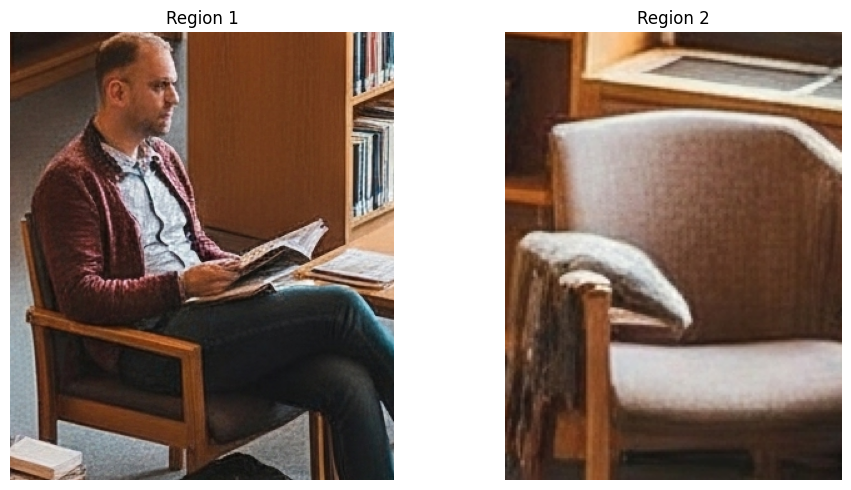

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_and_save_dense_grid(image_path, rows, cols, output_path="gridded_image.jpg"):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")

    img_rgb = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    cell_w = w // cols
    cell_h = h // rows

    grid_coords = []

    for row in range(rows):
        for col in range(cols):
            x = col * cell_w
            y = row * cell_h
            grid_coords.append((x, y, cell_w, cell_h))
            cv2.rectangle(img, (x, y), (x + cell_w, y + cell_h), (0, 255, 0), 1)
            cv2.putText(img, f"{row},{col}", (x + 3, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

    cv2.imwrite(output_path, img)

    img_to_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(img_to_show)
    plt.title(f"Saved Grid Image ({rows}x{cols})")
    plt.axis('off')
    plt.show()

    return grid_coords

def crop_custom_region_from_grid(image_path, grid_coords, region_points, rows, cols):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")

    h, w, _ = img.shape
    cell_w = w // cols
    cell_h = h // rows

    # Convert (row, col) to pixel coordinates
    polygon = []
    for row, col in region_points:
        x = col * cell_w
        y = row * cell_h
        polygon.append([x, y])
    polygon = np.array([polygon], dtype=np.int32)

    # Create mask and apply
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, polygon, 255)
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    # Bounding box crop
    x, y, w_box, h_box = cv2.boundingRect(polygon)
    cropped = masked_img[y:y+h_box, x:x+w_box]

    return cropped

# ---------- Usage ----------
image_path = r"C:\Users\swaya\Downloads\Gemini_Generated_Image_qi4z48qi4z48qi4z.png"  # Replace with your actual image file path
rows, cols = 40, 40

# Step 1: Create and save the gridded image
coords = plot_and_save_dense_grid(image_path, rows, cols)

# Step 2: Define regions by (row, col)
region1 = [(19, 17), (19, 23), (26, 23), (26, 17)]
region2 = [(15, 29), (15, 32), (19, 32), (19, 29)]


# Step 3: Crop the regions
sub_img1 = crop_custom_region_from_grid(image_path, coords, region1, rows, cols)
sub_img2 = crop_custom_region_from_grid(image_path, coords, region2, rows, cols)

# Step 4: Display both regions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sub_img1, cv2.COLOR_BGR2RGB))
plt.title("Region 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sub_img2, cv2.COLOR_BGR2RGB))
plt.title("Region 2")
plt.axis('off')

plt.tight_layout()
plt.show()


In [45]:
from datasets import load_dataset

dataset = load_dataset("prithivMLmods/Human-vs-NonHuman")


In [46]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 15635
    })
})

In [47]:
import os
from datasets import load_dataset
from PIL import Image

# Load dataset
dataset = load_dataset("prithivMLmods/Human-vs-NonHuman", split="train")

# Create target folders
for split in ["train", "val"]:
    for cls in ["human", "nonhuman"]:
        os.makedirs(f"./human_dataset/{split}/{cls}", exist_ok=True)

# Split dataset manually (e.g., 90% train, 10% val)
train_size = int(0.9 * len(dataset))

for i, item in enumerate(dataset):
    label = item["label"]
    image = item["image"]  # PIL image
    cls_name = "human" if label == 0 else "nonhuman"
    split = "train" if i < train_size else "val"

    save_path = f"./human_dataset/{split}/{cls_name}/{i}.jpg"
    image.save(save_path)


In [49]:
!pip install ultralytics

In [50]:
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # or yolov8s-cls.pt, etc.
model.train(data='human_dataset', epochs=10, imgsz=224)



Ultralytics 8.3.170  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=human_dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

train: Scanning C:\Users\swaya\Desktop\Timepass\python\yess\human_dataset\train... 14071 images, 0 corrupt: 100%|██████████| 14071/14071 [00:17<00:00, 824.84it/s]


train: New cache created: C:\Users\swaya\Desktop\Timepass\python\yess\human_dataset\train.cache
val: Fast image access  (ping: 0.10.0 ms, read: 0.80.1 MB/s, size: 8.1 KB)


val: Scanning C:\Users\swaya\Desktop\Timepass\python\yess\human_dataset\val... 1564 images, 0 corrupt: 100%|██████████| 1564/1564 [00:01<00:00, 838.90it/s]


val: New cache created: C:\Users\swaya\Desktop\Timepass\python\yess\human_dataset\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs\classify\train
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10     0.281G     0.7617         16        224:   4%|▍         | 34/880 [00:02<00:31, 27.09it/s]

       1/10     0.281G     0.6996         16        224:   8%|▊         | 72/880 [00:03<00:27, 29.83it/s]
       1/10     0.281G     0.6855         16        224:   9%|▉         | 79/880 [00:04<00:26, 30.56it/s]
       1/10     0.281G     0.6801         16        224:   9%|▉         | 83/880 [00:04<00:26, 30.20it/s]
       1/10     0.281G     0.6746         16        224:   9%|▉         | 83/880 [00:04<00:26, 30.20it/s]
100%|██████████| 755k/755k [00:00<00:00, 1.54MB/s]  224:  10%|▉         | 87/880 [00:04<00:26, 29.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 49/49 [00:00<00:00, 67.36it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 49/49 [00:00<00:00, 73.38it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 49/49 [00:00<00:00, 69.97it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 49/49 [00:00<00:00, 67.59it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 49/49 [00:00<00:00, 53.02it/s]

                   all      0.905          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 49/49 [00:00<00:00, 68.45it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 49/49 [00:00<00:00, 71.94it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 49/49 [00:00<00:00, 66.92it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 49/49 [00:00<00:00, 68.64it/s]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.285G   0.004499          7        224: 100%|██████████| 880/880 [00:26<00:00, 33.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 49/49 [00:00<00:00, 69.37it/s]

                   all      0.996          1



10 epochs completed in 0.080 hours.
Optimizer stripped from runs\classify\train\weights\last.pt, 3.0MB
Optimizer stripped from runs\classify\train\weights\best.pt, 3.0MB

Validating runs\classify\train\weights\best.pt...
Ultralytics 8.3.170  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: C:\Users\swaya\Desktop\Timepass\python\yess\human_dataset\train... found 14071 images in 2 classes  
ERROR val: C:\Users\swaya\Desktop\Timepass\python\yess\human_dataset\val... found 1564 images in 1 classes (requires 2 classes, not 1)
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 49/49 [00:00<00:00, 60.05it/s]


                   all      0.996          1
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023B8FABFEE0>
curves: []
curves_results: []
fitness: 0.9980818331241608
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9961636662483215, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9980818331241608}
save_dir: WindowsPath('runs/classify/train')
speed: {'preprocess': 0.12689053691039934, 'inference': 0.2619234015545843, 'loss': 0.00040070339858703445, 'postprocess': 0.0008850381426784732}
task: 'classify'
top1: 0.9961636662483215
top5: 1.0

In [52]:
results = model(r"C:\Users\swaya\Downloads\Gemini_Generated_Image_qi4z48qi4z48qi4z.png")
print(results[0].probs)  # shows class probabilities



image 1/1 C:\Users\swaya\Downloads\Gemini_Generated_Image_qi4z48qi4z48qi4z.png: 224x224 human 1.00, nonhuman 0.00, 6.1ms
Speed: 29.4ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
ultralytics.engine.results.Probs object with attributes:

data: tensor([1.0000e+00, 3.4038e-10], device='cuda:0')
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(1., device='cuda:0')
top5: [0, 1]
top5conf: tensor([1.0000e+00, 3.4038e-10], device='cuda:0')


In [56]:
from ultralytics import YOLO

# Load the trained classification model
model = YOLO(r"C:\Users\swaya\Desktop\Timepass\python\yess\runs\classify\train\weights\best.pt")


In [60]:
from PIL import Image
import cv2

def classify_image(numpy_bgr_img):
    # Convert BGR (OpenCV) → RGB (PIL)
    rgb_img = cv2.cvtColor(numpy_bgr_img, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(rgb_img)

    # Run inference using YOLOv8 classification model
    results = model(pil_img)

    # Get predicted class index (0 or 1)
    pred_class = results[0].probs.top1
    return pred_class


In [61]:
label1 = classify_image(sub_img1)
label2 = classify_image(sub_img2)

print("Region 1 Prediction:", "Human" if label1 == 0 else "Non-Human")
print("Region 2 Prediction:", "Human" if label2 == 0 else "Non-Human")



0: 224x224 human 1.00, nonhuman 0.00, 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 nonhuman 0.96, human 0.04, 6.2ms
Speed: 2.6ms preprocess, 6.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Region 1 Prediction: Human
Region 2 Prediction: Non-Human
